<a href="https://colab.research.google.com/github/Ivan412/training/blob/main/6_python_advaced/3_visualization/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Продвинутый Python. Часть 3: Визуализация зависимостей. Временные ряды.

---


#**Задание: скользящие средние на биржевых графиках**

Используя данные индекса РТС за последние годы

https://video.ittensive.com/python-advanced/rts-index.csv

постройте отдельные графики закрытия (Close) индекса по дням за 2017, 2018, 2019 годы в единой оси X.

Добавьте на график экспоненциальное среднее за 20 дней для значения Max за 2017 год.

Найдите последнюю дату, когда экспоненциальное среднее максимального дневного значения (Max) в 2017 году было больше, чем соответствующее значение Close в 2019 году (это последнее пересечение графика за 2019 год и графика для среднего за 2017 год).

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
data  = pd.read_csv('https://video.ittensive.com/python-advanced/rts-index.csv', delimiter=',')

In [ ]:
#Преобразуем Date к дате и пересоберем индекс
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y')
data = data.set_index('Date')
#создадим отдельный столбец с номерами дней в году
data['DoY'] = data.index.to_series().apply(lambda x: pd.date_range(x, periods=1, freq="D").day_of_year[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string

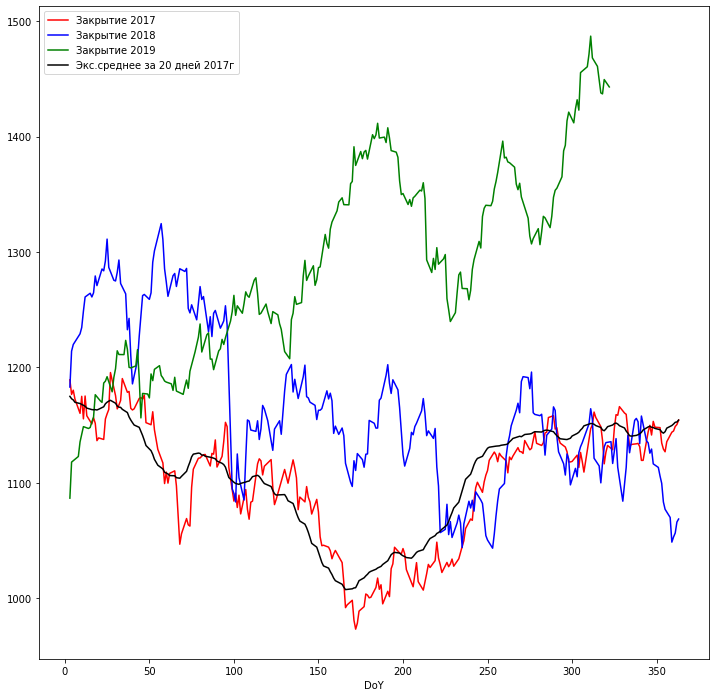

In [ ]:
#создадим холст
fig = plt.figure(figsize=(12,12))
(area1) = fig.subplots(1, 1)
#возмем данные закрытия за 1 год по номерам дней и проиндексируем по номерам дней
data['2017'][['Close', 'DoY']].set_index('DoY').plot(ax=area1, color="red")
data['2018'][['Close', 'DoY']].set_index('DoY').plot(ax=area1, color="blue")
data['2019'][['Close', 'DoY']].set_index('DoY').plot(ax=area1, color="green")
#дополнительно посчитаем Экс. среднее за 20 дней
data['2017'][['Max', 'DoY']].set_index('DoY').ewm(span=20).mean().plot(ax=area1, color="black")
area1.legend(["Закрытие 2017", "Закрытие 2018", "Закрытие 2019", "Экс.среднее за 20 дней 2017г"])
plt.show()

In [ ]:
#Найдем дату  последнее пересечение графика за 2019 год и графика для среднего за 2017 год
cross = data['2019']['Close'].loc[data['2019']['Close'] < data['2017']['Max'].ewm(span=20).mean().max()].idxmax()
print(f'Последняя дата, когда экспоненциальное среднее максимального дневного значения (Max) в 2017 году было больше, чем соответствующее значение Close в 2019 году: {cross}')

Последняя дата, когда экспоненциальное среднее максимального дневного значения (Max) в 2017 году было больше, чем соответствующее значение Close в 2019 году: 2019-02-19 00:00:00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  
